In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

import utils

In [2]:
length = 199 # 200?

In [3]:
# directory = '../../data/experiments/gail/imitate/validation/'
# gail_trajs, gail_labels = tuils.load_trajs_labels(directory)

# directory = '../../data/experiments/infogail/imitate/validation/'
# infogail_trajs, infogail_labels = tuils.load_trajs_labels(directory)

# directory = '../../data/experiments/hgail/imitate/validation/'
# hgail_trajs, hgail_labels = tuils.load_trajs_labels(directory)

# directory = '../../data/experiments/gail-recurrent/imitate/validation/'
# rgail_trajs, rgail_labels = tuils.load_trajs_labels(directory)

# directory = '../../data/experiments/hgail_8_latent/imitate/validation/'
# 'data/experiments/hgail_8_latent/validation'
# h8gail_trajs, h8gail_labels = tuils.load_trajs_labels(directory)

directory = '../../data/experiments/1_gail/imitate/validation/'
gail_trajs, gail_labels = utils.load_trajs_labels(directory)

directory = '../../data/experiments/1_infogail/imitate/validation/'
infogail_trajs, infogail_labels = utils.load_trajs_labels(directory)

directory = '../../data/experiments/1_recurrent_gail/imitate/validation/'
rgail_trajs, rgail_labels = utils.load_trajs_labels(directory)

directory = '../../data/experiments/1_hgail/imitate/validation/'
hgail_trajs, hgail_labels = utils.load_trajs_labels(directory)


In [4]:
def visualize_trajectories(trajs, length, label='', color='blue', attr='rmse'):
    rmses = []
    for traj in trajs:
        if len(traj[attr]) == length:
            rmses.append(traj[attr])
    rmses = np.array(rmses)
    mean = np.mean(rmses, axis=0)
    bound = np.std(rmses, axis=0) / np.sqrt(len(rmses)) / 2
    x = range(len(mean))
    plt.fill_between(x, mean - bound, mean + bound, alpha=.4, color=color)
    plt.plot(x, mean, c=color, label='mean {}: {:.5f}'.format(attr, np.mean(rmses)))
    plt.xlabel('timesteps')
    plt.ylabel(attr)
    plt.title(label)
    plt.legend()

In [5]:
# def plot_validation(trajs, labels, color='blue', length=199, attr='rmse'):
#     for i, traj in enumerate(trajs):
#         plt.subplot(2,3,i+1)
#         visualize_trajectories(traj, length, labels[i], attr=attr, color=color)
def plot_validation(trajs, labels, color='blue', length=199, attr='rmse'):
    trajs = [
        trajs[0],
        np.concatenate((trajs[1], trajs[2])),
        np.concatenate((trajs[3], trajs[4], trajs[5]))
    ]
    labels = [
        labels[0],
        labels[1] + ' ' + labels[2],
        labels[3] + ' ' + labels[4] + ' ' + labels[4] 
    ]
    for i, traj in enumerate(trajs):
        plt.subplot(1,3,i+1)
        visualize_trajectories(traj, length, labels[i], attr=attr, color=color)

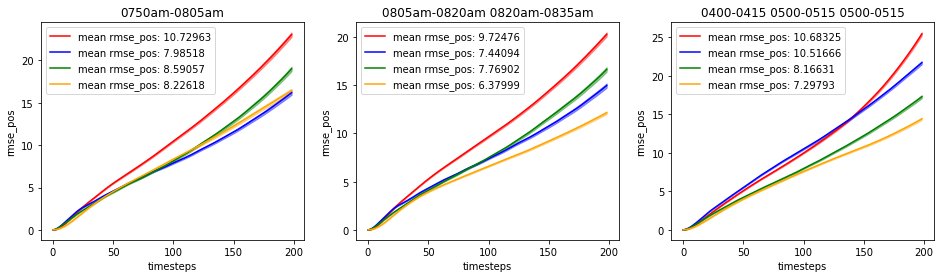

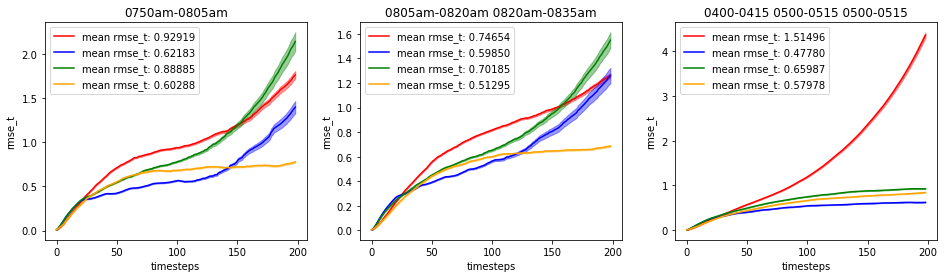

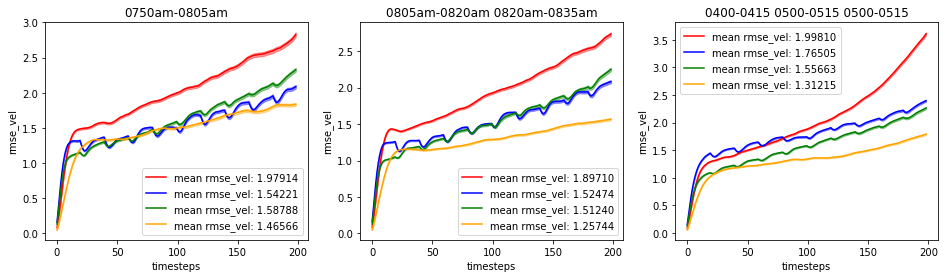

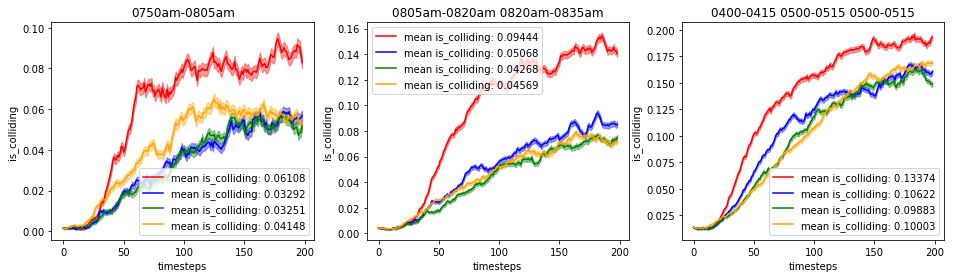

In [6]:
attrs = ['rmse_pos', 'rmse_t', 'rmse_vel', 'is_colliding']
for attr in attrs:
    plt.figure(figsize=(16,4))
    plot_validation(gail_trajs, gail_labels, color='red', attr=attr)
    plot_validation(infogail_trajs, infogail_labels, color='blue', attr=attr)
    plot_validation(hgail_trajs, hgail_labels, color='green', attr=attr)
    plot_validation(rgail_trajs, rgail_labels, color='orange', attr=attr)
    plt.show()